In [94]:
from annoy import AnnoyIndex
import numpy as np
from numpy.random import random
from functools import partial
from matplotlib import pyplot as plt

0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
3 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
4 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
5 [0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
6 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
7 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
8 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
9 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
10 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
11 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
12 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
13 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
14 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]


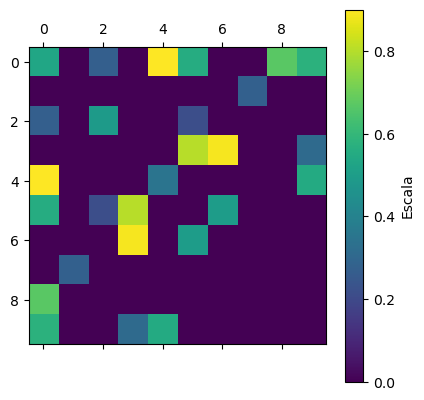

In [106]:

# Crea un índice Annoy con la dimensión adecuada (5 en este ejemplo)
items = 10
polys = dict()
matrix = np.zeros((items,items))
for i in range(items):
    for j in range(items):
        if random() > 0.9:
            v = random()
            polys[(i,j)] = v
            matrix[(i,j)] = v
            matrix[(j,i)] = v

def tupla_a_vector_binario(tupla,size):
    output = np.zeros(size)
    for i in tupla:
        output[i] = 1
    return output

t2bv = partial(tupla_a_vector_binario,size=items)
dimension = items
index = AnnoyIndex(dimension, metric='angular')  # Utiliza métrica angular para similitud binaria

i = 0
for tupla,value in polys.items():
    index.add_item(i,t2bv(tupla))
    print(i,t2bv(tupla))
    i+= 1

index.build(10)
query_vector = t2bv((1,2))
results = index.get_nns_by_vector(query_vector, 1)

plt.matshow(matrix)
plt.colorbar(label="Escala")



